<a href="https://colab.research.google.com/github/Gertrud-Violett/Makkiblog_Share/blob/main/wavFFT_Noise_Plot_wPeriodogram_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FFT Plotting tool for noise analysis README**
For Colaboratory Usage, please refer to google official documentation:\
Colaboratoryの使い方についてはgoogleのチュートリアルを参照ください。

## **wavファイルの準備**
1.   google driveに解析対象のファイルを保存し、Colabを立ち上げます。
2.   wavdatanameに保存パスを入力します：ローカル実行環境を設定していないと読み込みエラーになるためgoogle driveなどに保存してください。
3.   Ctrl+F9で実行
4.   サンプルデータとしてSampleNoise.wavを同ディレクトリに保存しています。使用環境に入れてパスを書き換えてご利用ください。
https://drive.google.com/file/d/1W8wlMDUX2Tu31ZqNgAypWb1jSOQWZo84/view?usp=sharing
5.   うまくいかない場合は、一旦本ipynbファイルをコピーして各自環境で動かしてみてください。

## **ツール設定項目**
設定項目を入力して読み込みファイルを指定します。
*   描画レンジ：X軸(周波数)：Frequency_Max：最大周波数のレンジを設定
*   描画レンジ：Y軸(Db)：DecibelMin / DecibelMax: 見やすいように適宜レンジを設定
*   読み込みファイル名：wavdataname: Colabアカウントで連携済のパス+ファイル名を指定。解析可能なのはwavファイル限定です。

## **Periodogram / csv 使い方**
*   Periodogram使い方：コード本文"plot each frequency"セクションで変数nをエディット
*   csv出力：本ipynbをコピーして #set axis and output to array csv, Uncomment to output csv dataセクションをアンコメント。各自環境で実行すればcsv出力されます。


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Setup
import numpy as np
import scipy.fftpack
from scipy import signal
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import os
import sys
import configparser
import codecs
import json
import csv
import wave
from numpy import savetxt
import pylab

#mpl.rcParams['agg.path.chunksize'] = 100000

In [45]:
#Setup (Visual)
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['figure.facecolor'] = 'white'

### SETTINGS

In [46]:
Frequency_Max = 1000 #@param {type:"integer"}
DecibelMin = 25 #@param {type:"slider", min:0, max:220, step:1}
DecibelMax = 50 #@param {type:"slider", min:0, max:220, step:1}

#wav data read
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

#plot
def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file + '.wav')
    print(sound_info,frame_rate)
    fig = plt.figure(num=None, figsize=(16, 8))
    plt.subplot(111)
    plt.title('spectrogram of %r' % wav_file)
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    #Set for periodogram NFFT setting
    #NFFT = int(frame_rate*0.005)
    data = plt.specgram(sound_info, Fs=frame_rate, cmap='jet')
    
    #Xaxis and Y axix parameter setting
    plt.ylim(0,Frequency_Max)
    plt.clim(DecibelMin, DecibelMax)
    
    fig.colorbar(data[3]).set_label('Intensity [dB]')
    plt.savefig(wav_file + 'specgram.png')
    
    #set axis and output to array csv, Uncomment to output csv data
    freqdf = np.transpose([np.append(0.0,data[1])])
    timedf = [data[2]]
    #print('FREQ',freqdf)
    #print('TIME',timedf)
    #savetxt(wav_file + '_freq.csv', freqdf, delimiter=',')
    #savetxt(wav_file + '_time.csv', timedf, delimiter=',')
    arr0 = np.append(timedf, data[0], axis = 0)
    csvarr = np.append(freqdf, arr0, axis = 1)
    #savetxt(wav_file + '.csv', csvarr, delimiter=',')

    #plot each frequency
    #set n=1 for 0Hz and and n for higher frequency: resolution depends on sampling rate
    n = 2
    while n < 2:
        xdata = csvarr[0,:]
        ydata = csvarr[n,:]
        print('X', xdata)
        print('Y', ydata)
        cutfreq = str(int(ydata[0]))
    
        plt.figure(num=None, figsize=(16, 8))
        plt.subplot(111)
        plt.title('Intensity_at_' + cutfreq + '[Hz]')
        plt.xlabel('Time [s]')
        plt.ylabel('Intensity [dB]')
        ylim(20,110)
        xdata = np.delete(xdata, 0)
        ydata = np.delete(ydata, 0)
        ydata = 20*np.log10(ydata)
        print(ydata)
        plt.plot(xdata, ydata) 
        plt.savefig(wav_file + '_' + cutfreq + 'Hz_cut.png')
        
        n = n + 1


### Plot Data

[-21681 -22528     84 ... -10543  -8195   -246] 48000


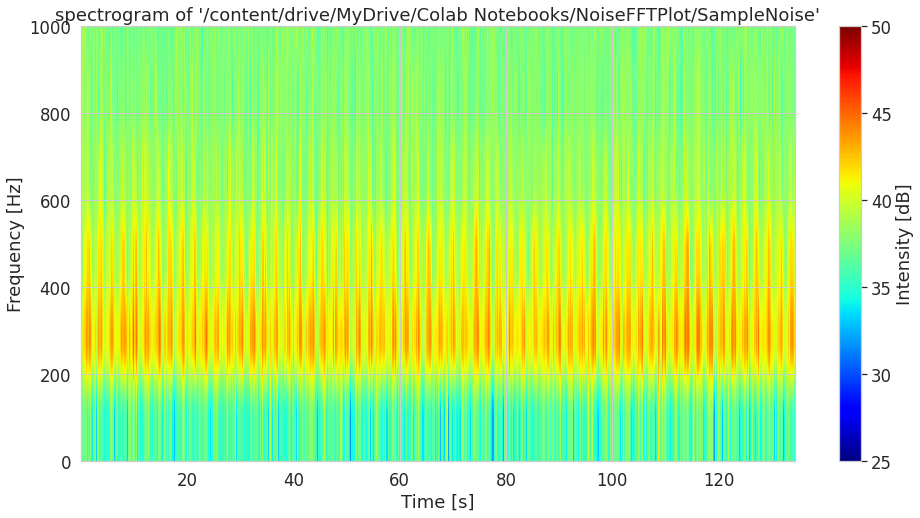

In [47]:
wavdataname = "/content/drive/MyDrive/Colab Notebooks/NoiseFFTPlot/SampleNoise" #@param {type:"string"}
# wav_plot

#Enter .wav file name in ''
#graph_spectrogram('/content/drive/MyDrive/Colab Notebooks/NoiseFFTPlot/SampleNoise')
graph_spectrogram(wavdataname)

